## plot per-class AP

In [41]:
def calc_sorted_AP(ANNOTATION_PATH, RESULT_PATH, ANN_TYPE, SAVE_PATH, sorted_id):
    lvis_eval = LVISEvalPerCat(ANNOTATION_PATH, RESULT_PATH, ANN_TYPE, SAVE_PATH)
    lvis_eval.run()
#     lvis_eval.print_results()

    lables_json_file = "/mnt/data-disk2/xinting/project/maskrcnn/labels.json"
    result_AP_json_file = os.path.join(SAVE_PATH, 'lvis_result_percat_mAP.json')

    #show result AP by sorted 

    with open(lables_json_file, 'r') as f:
        lables = json.load(f)
    with open(result_AP_json_file, 'r') as f:
        result_AP = json.load(f)
   
    #num_class = len(sorted_id)
    sorted_cls_AP = []
    valid_cls_id = []
    for cls_i in sorted_id:
        if result_AP[str(cls_i)]!=-1:
            valid_cls_id.extend([cls_i])
            sorted_cls_AP.extend([result_AP[str(cls_i)]])
    return valid_cls_id, sorted_cls_AP

RESULT_PATH = "/mnt/data-disk2/xinting/project/maskrcnn/ckp-fewshot-base100/Validation/lvis_dt.json"
ANNOTATION_PATH = "/mnt/data-disk2/xinting/project/dataset/LVIS/lvis_subset3/lvis_v0.5_val_top116.json"
sorted_id_json_file = "/mnt/data-disk2/xinting/project/dataset/LVIS/lvis_subset3/lvis_sorted_id_test.json"
SAVE_PATH = "/mnt/data-disk2/xinting/project/maskrcnn/ckp-fewshot-base100/Validation"
ANN_TYPE = 'bbox'
with open(sorted_id_json_file, 'r') as f:
    sorted_id = json.load(f)
    
valid_cls_id1, sorted_cls_AP1 =  calc_sorted_AP(ANNOTATION_PATH, RESULT_PATH, ANN_TYPE, SAVE_PATH, sorted_id)


category : 4 : 0.0
category : 13 : 0.41024231018715746
category : 30 : 0.0
category : 34 : 0.18126145868403667
category : 35 : 0.14306392452782254
category : 36 : 0.25589899536341076
category : 45 : 0.3059085303044758
category : 50 : 0.14168763667222378
category : 59 : 0.35624392260270943
category : 61 : 0.181635731876884
category : 81 : 0.42936281810602783
category : 88 : 0.028069306930693063
category : 89 : 0.0
category : 91 : 0.2560557737448363
category : 95 : 0.27143441614052977
category : 99 : 0.29327452522919056
category : 118 : 0.2015753650339703
category : 124 : 0.12554115851145553
category : 126 : 0.21458032008151448
category : 132 : 0.23027733621718194
category : 133 : 0.24831500696620035
category : 139 : 0.38724016235474945
category : 146 : 0.0
category : 154 : 0.3626866719483012
category : 174 : 0.0
category : 179 : 0.21064209887416918
category : 183 : 0.265125814004148
category : 197 : 0.12229696126150524
category : 208 : 0.37001736353488507
category : 211 : 0.345780227081

In [86]:
sorted_id_step1 = "/mnt/data-disk2/xinting/project/dataset/LVIS/lvis_subset3/lvis_sorted_id_test.json"
data_path_finetune_step1_4000 = "/mnt/data-disk2/xinting/project/maskrcnn/ckp-fewshot-joint_baseline16/Validation/28000"
ap_finetune_step1_4000 = load_sorted_AP(sorted_id_step1, data_path_finetune_step1_4000, 116)


In [90]:
np.mean(ap_finetune_step1_4000[-16:])

0.25031032677150056

In [42]:
# original evaluation
import logging
from lvis import LVIS, LVISResults, LVISEval
import json
# result and val files for 100 randomly sampled images.

lvis_eval = LVISEval(ANNOTATION_PATH, RESULT_PATH, ANN_TYPE)
lvis_eval.run()
lvis_eval.print_results()

 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=300 catIds=all] = 0.220
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=300 catIds=all] = 0.397
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=300 catIds=all] = 0.217
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=     s | maxDets=300 catIds=all] = 0.171
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=     m | maxDets=300 catIds=all] = 0.275
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=     l | maxDets=300 catIds=all] = 0.330
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=300 catIds=  r] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=300 catIds=  c] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=300 catIds=  f] = 0.220
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 catIds=all] = 0.298
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=     s | maxDets=300 catIds=all] = 0.222
 Average

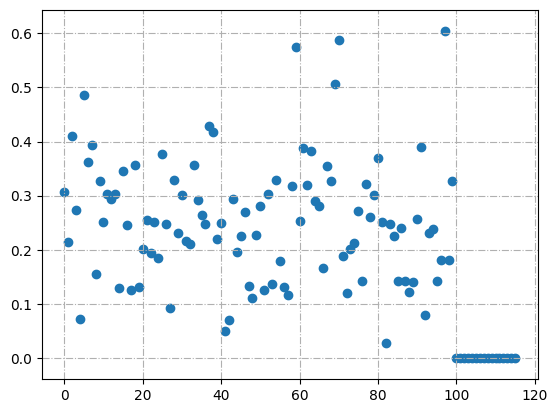

In [43]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

cls_id_116_head = np.arange(116)
plt.scatter(cls_id_116_head, sorted_cls_AP1)

# cls_id_108_tail = np.arange(100,106)
# plt.scatter(cls_id_108_tail, sorted_cls_AP108[100:106], color='g')
# plt.bar(cls_id, sorted_cls_AP, align='center', alpha=0.5)
# plt.xticks(y_pos, objects)
# plt.ylabel('Usage')
plt.grid(linestyle='-.',which='both')
# plt.title('Programming language usage')
plt.show() 

In [2]:
import logging
from lvis import LVIS, LVISResults, LVISEval, LVISEvalPerCat
import json
import os 
import numpy as np

lables_json_file = "/mnt/data-disk2/xinting/project/maskrcnn/labels.json"
with open(lables_json_file, 'r') as f:
    lables = json.load(f)
    
def load_sorted_AP(sorted_id_json_file, data_path, top_n):
    result_AP_json_file = os.path.join(data_path, 'lvis_result_percat_mAP.json')

    with open(sorted_id_json_file, 'r') as f:
        sorted_id = json.load(f)
    #show result AP by sorted 

    with open(result_AP_json_file, 'r') as f:
        result_AP = json.load(f)

    sorted_cls_AP = []
    valid_cls_id  = []
    for cls_i in sorted_id[:top_n]:
        if result_AP[str(cls_i)]!=-1:
            valid_cls_id.extend([cls_i])
            sorted_cls_AP.extend([result_AP[str(cls_i)]])
    return sorted_cls_AP

In [6]:
sorted_id_json_file = "/mnt/data-disk2/xinting/project/dataset/LVIS/lvis_subset3/lvis_sorted_id_test.json"
data_path_2000 = "/mnt/data-disk2/xinting/project/maskrcnn/ckp-fewshot-joint_baseline16/Validation/2000"
ap_iter_2000 = load_sorted_AP(sorted_id_json_file, data_path_2000, 116)

In [74]:
sorted_id_json_file = "/mnt/data-disk2/xinting/project/dataset/LVIS/lvis_subset3/lvis_sorted_id_test.json"
data_path_500 = "/mnt/data-disk2/xinting/project/maskrcnn/ckp-fewshot-joint_baseline16/Validation/17500"
ap_iter_1500 = load_sorted_AP(sorted_id_json_file, data_path_500, 116)

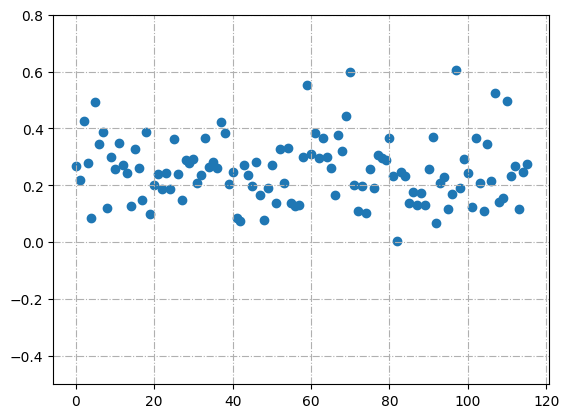

[0.06856562436494466, 0.008384348818462875, 0.15345185679608894, 0.0027027688684361393, 0.02422455926547867, 0.08154177376185726, 0.0074233751963193005, 0.40256097927198764, 0.028838213733132608, 0.06103565734556485, 0.41656888128390535, 0.01680923347139365, 0.15968570478103467, 0.002996979109675674, 0.09527828745773458, 0.06171548774466421]


In [75]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

cls_id_head = np.arange(116)
plt.scatter(cls_id_head,np.array(ap_iter_1500))

# plt.bar(cls_id, sorted_cls_AP, align='center', alpha=0.5)
# plt.xticks(y_pos, objects)
# plt.ylabel('Usage')
axes = plt.gca();axes.set_ylim([-0.5,0.8])
plt.grid(linestyle='-.',which='both')
# plt.title('Programming language usage')
plt.show()  
print(ap_iter_500[100:])

In [17]:
ap_iter_3000[100:]

[0.24147503280479354,
 0.12833662636608253,
 0.3295295143128248,
 0.16129334806211681,
 0.09966958952073039,
 0.2635817019734962,
 0.12885465946374453,
 0.44229102728206626,
 0.04325300092283828,
 0.12610278894730587,
 0.4731063016335576,
 0.16264920544572772,
 0.2630617477407612,
 0.05819307096883468,
 0.14308629614193702,
 0.25995117832787046]

In [82]:
sorted_id_json_file = "/mnt/data-disk2/xinting/project/dataset/LVIS/lvis_subset3/lvis_sorted_id_test.json"
data_path_2fc_3000_1 = "/mnt/data-disk2/xinting/project/maskrcnn/ckps/ckp-fewshot-novel_multigpu_step16_freeze3/Validation/2000"
ap_iter_2fc_3000_1 = load_sorted_AP(sorted_id_json_file, data_path_2fc_3000_1, 116)

In [80]:
sorted_id_json_file = "/mnt/data-disk2/xinting/project/dataset/LVIS/lvis_subset3/lvis_sorted_id_test.json"
data_path_2fc_3000 = "/mnt/data-disk2/xinting/project/maskrcnn/ckps/ckp-fewshot-novel_multigpu_step16_freeze3/Validation/1500"
ap_iter_2fc_3000 = load_sorted_AP(sorted_id_json_file, data_path_2fc_3000, 116)

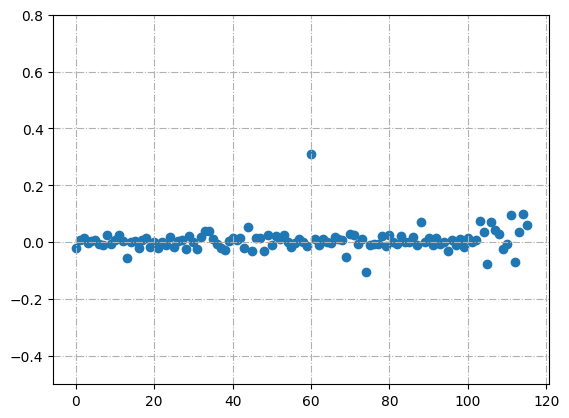

[0.06856562436494466, 0.008384348818462875, 0.15345185679608894, 0.0027027688684361393, 0.02422455926547867, 0.08154177376185726, 0.0074233751963193005, 0.40256097927198764, 0.028838213733132608, 0.06103565734556485, 0.41656888128390535, 0.01680923347139365, 0.15968570478103467, 0.002996979109675674, 0.09527828745773458, 0.06171548774466421]


In [83]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

cls_id_head = np.arange(116)
plt.scatter(cls_id_head,np.array(ap_iter_1500)-np.array(ap_iter_2fc_3000_1))

# plt.bar(cls_id, sorted_cls_AP, align='center', alpha=0.5)
# plt.xticks(y_pos, objects)
# plt.ylabel('Usage')
axes = plt.gca();axes.set_ylim([-0.5,0.8])
plt.grid(linestyle='-.',which='both')
# plt.title('Programming language usage')
plt.show()  
print(ap_iter_500[100:])

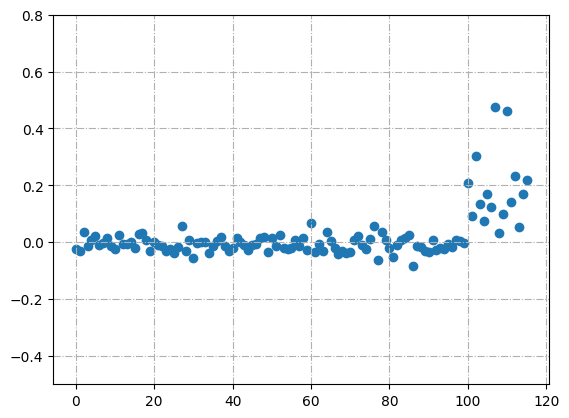

In [15]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

cls_id_head = np.arange(116)
plt.scatter(cls_id_head,np.array(ap_iter_1500)-np.array(sorted_cls_AP1))

# plt.bar(cls_id, sorted_cls_AP, align='center', alpha=0.5)
# plt.xticks(y_pos, objects)
# plt.ylabel('Usage')
axes = plt.gca();axes.set_ylim([-0.5,0.8])
plt.grid(linestyle='-.',which='both')
# plt.title('Programming language usage')
plt.show()  

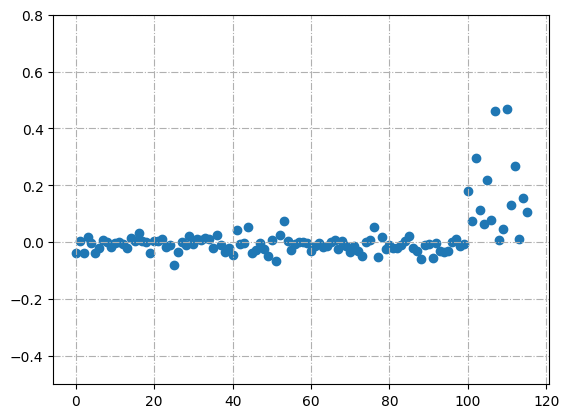

In [13]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

cls_id_head = np.arange(116)
plt.scatter(cls_id_head,np.array(ap_iter_1000)-np.array(sorted_cls_AP1))

# plt.bar(cls_id, sorted_cls_AP, align='center', alpha=0.5)
# plt.xticks(y_pos, objects)
# plt.ylabel('Usage')
axes = plt.gca();axes.set_ylim([-0.5,0.8])
plt.grid(linestyle='-.',which='both')
# plt.title('Programming language usage')
plt.show()  

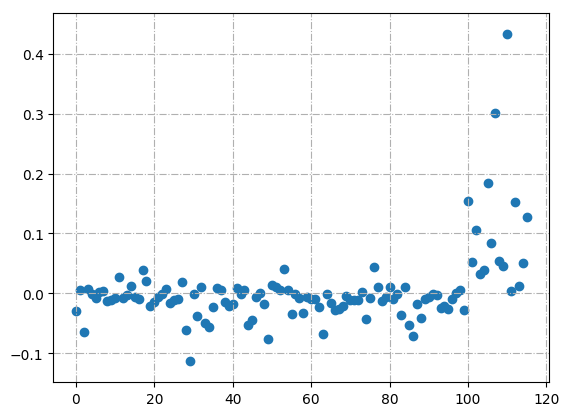

In [51]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

cls_id_head = np.arange(116)
plt.scatter(cls_id_head,np.array(ap_iter_200)-np.array(sorted_cls_AP1))

# plt.bar(cls_id, sorted_cls_AP, align='center', alpha=0.5)
# plt.xticks(y_pos, objects)
# plt.ylabel('Usage')
plt.grid(linestyle='-.',which='both')
# plt.title('Programming language usage')
plt.show()  

In [49]:
sorted_id_json_file = "/mnt/data-disk0/db_zhangdong/LVIS/lvis_subset3/lvis_sorted_id_test.json"
data_path_400 = "/mnt/data-disk0/xinting/LVIS/maskrcnn-benchmark/ckps/ckp-fewshot-novel_multigpu_step16/Validation/400"
ap_iter_400 = load_sorted_AP(sorted_id_json_file, data_path_400, 116)

In [4]:
sorted_id_json_file = "/mnt/data-disk0/db_zhangdong/LVIS/lvis_sorted_id_test.json"
basedata_path = "/mnt/data-disk0/xinting/LVIS/maskrcnn-benchmark/ckps/ckp-fewshot-base100/Validation"
base_ap = load_sorted_AP(sorted_id_json_file, basedata_path, 100)

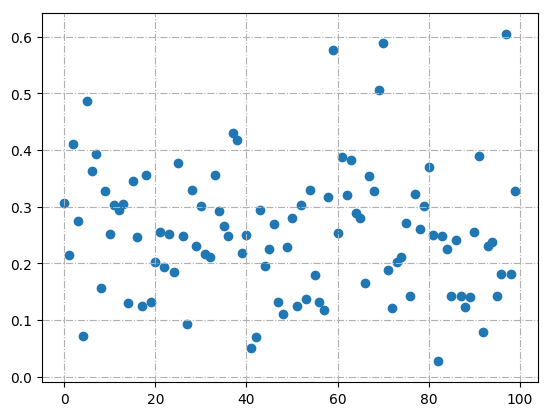

In [40]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

cls_id_head = np.arange(100)
plt.scatter(cls_id_head,np.array(base_ap[:100]))

# plt.bar(cls_id, sorted_cls_AP, align='center', alpha=0.5)
# plt.xticks(y_pos, objects)
# plt.ylabel('Usage')
plt.grid(linestyle='-.',which='both')
# plt.title('Programming language usage')
plt.show()  

In [6]:
# sorted_id_json_file = "/mnt/data-disk0/db_zhangdong/LVIS/lvis_subset2/lvis_sorted_id_test.json"
# data_path_500 = "/mnt/data-disk0/xinting/LVIS/maskrcnn-benchmark/ckps/ckp-fewshot-novel_multigpu/Validation/500"
# ap_iter_500 = get_sorted_AP(sorted_id_json_file, data_path_500, 108)

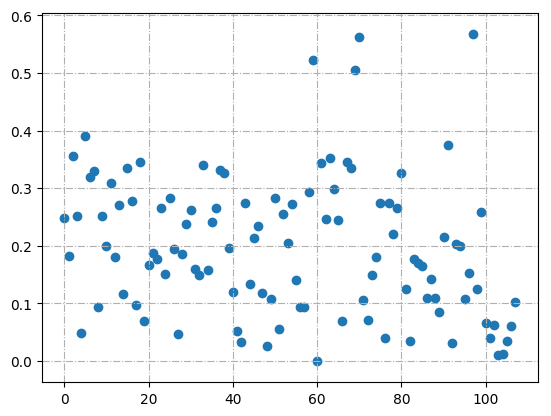

In [7]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

cls_id_head = np.arange(108)
plt.scatter(cls_id_head,ap_iter_500)

# plt.bar(cls_id, sorted_cls_AP, align='center', alpha=0.5)
# plt.xticks(y_pos, objects)
# plt.ylabel('Usage')
plt.grid(linestyle='-.',which='both')
# plt.title('Programming language usage')
plt.show() 

In [8]:
base_ap = base_ap+[0]*8

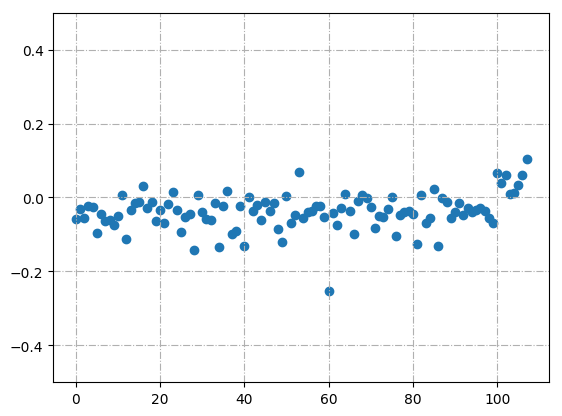

In [31]:
cls_id_head = np.arange(108)
plt.scatter(cls_id_head,np.array(ap_iter_500)-np.array(base_ap))
axes = plt.gca(); axes.set_ylim([-0.5,0.5])

plt.grid(linestyle='-.',which='both')
# plt.title('Programming language usage')
plt.show() 

In [13]:
sorted_id_json_file = "/mnt/data-disk0/db_zhangdong/LVIS/lvis_subset2/lvis_sorted_id_test.json"
data_path_1000 = "/mnt/data-disk0/xinting/LVIS/maskrcnn-benchmark/ckps/ckp-fewshot-novel_multigpu/Validation/1000"
ap_iter_1000 = get_sorted_AP(sorted_id_json_file, data_path_1000, 108)

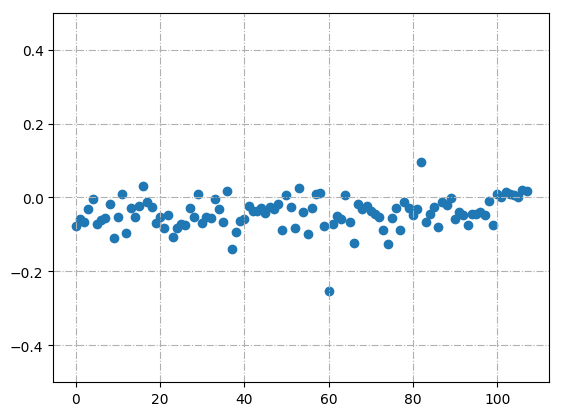

In [33]:
cls_id_head = np.arange(108)
plt.scatter(cls_id_head,np.array(ap_iter_1000)-np.array(base_ap))
axes = plt.gca(); axes.set_ylim([-0.5,0.5])

plt.grid(linestyle='-.',which='both')
# plt.title('Programming language usage')
plt.show() 

In [19]:
sorted_id_json_file = "/mnt/data-disk0/db_zhangdong/LVIS/lvis_subset2/lvis_sorted_id_test.json"
data_path_1500 = "/mnt/data-disk0/xinting/LVIS/maskrcnn-benchmark/ckps/ckp-fewshot-novel_multigpu/Validation/1500"
ap_iter_1500 = get_sorted_AP(sorted_id_json_file, data_path_1500, 108)

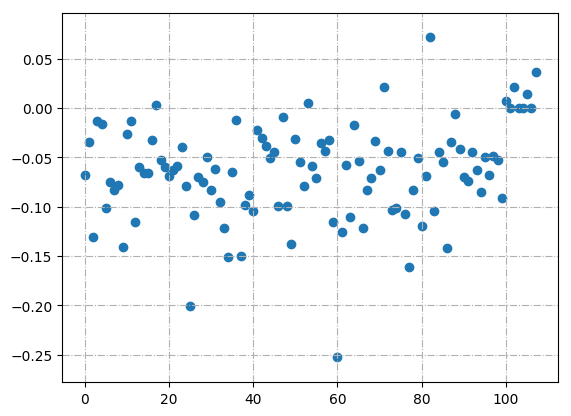

In [21]:
cls_id_head = np.arange(108)
plt.scatter(cls_id_head,np.array(ap_iter_1500-np.array(base_ap)))
plt.grid(linestyle='-.',which='both')
# plt.title('Programming language usage')
plt.show() 

In [22]:
sorted_id_json_file = "/mnt/data-disk0/db_zhangdong/LVIS/lvis_subset2/lvis_sorted_id_test.json"
data_path_500_2 = "/mnt/data-disk0/xinting/LVIS/maskrcnn-benchmark/ckps/ckp-fewshot-novel_multigpu2/Validation/500"
ap_iter_500_2 = get_sorted_AP(sorted_id_json_file, data_path_500_2, 108)

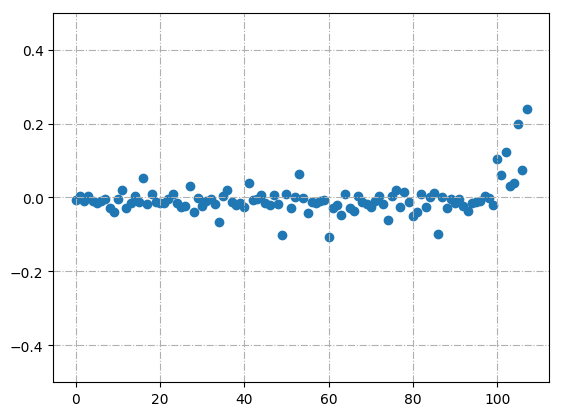

In [30]:
cls_id_head = np.arange(108)
plt.scatter(cls_id_head,np.array(ap_iter_500_2-np.array(base_ap)))
axes = plt.gca(); axes.set_ylim([-0.5,0.5])
plt.grid(linestyle='-.',which='both')
# plt.title('Programming language usage')
plt.show() 

In [24]:
sorted_id_json_file = "/mnt/data-disk0/db_zhangdong/LVIS/lvis_subset2/lvis_sorted_id_test.json"
data_path_1000_2 = "/mnt/data-disk0/xinting/LVIS/maskrcnn-benchmark/ckps/ckp-fewshot-novel_multigpu2/Validation/1000"
ap_iter_1000_2 = get_sorted_AP(sorted_id_json_file, data_path_1000_2, 108)

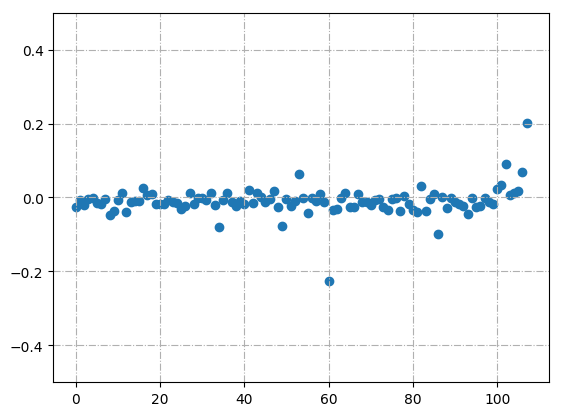

In [28]:
cls_id_head = np.arange(108)
plt.scatter(cls_id_head,np.array(ap_iter_1000_2-np.array(base_ap)))
plt.grid(linestyle='-.',which='both')
axes = plt.gca()
axes.set_ylim([-0.5,0.5])
# plt.title('Programming language usage')
plt.show() 


# axes.set_ylim([ymin,ymax])